<a href="https://colab.research.google.com/github/chrisflath/MPS_2019/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Analysis with R

In [1]:
install.packages("TTR")
library("TTR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘zoo’

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


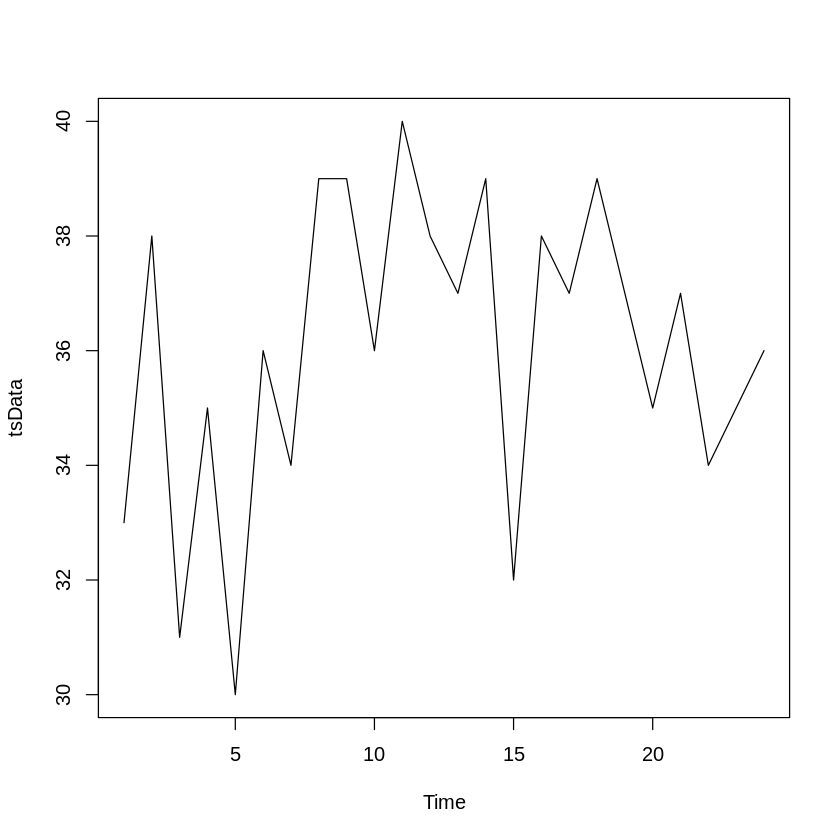

In [2]:
data <- c(33,38,31,35,30,36,34,39,39,36,40,38,37,39,32,38,37,39,37,35,37,34,35,36)

tsData <- ts(data)
plot(tsData)

## Simple moving averages

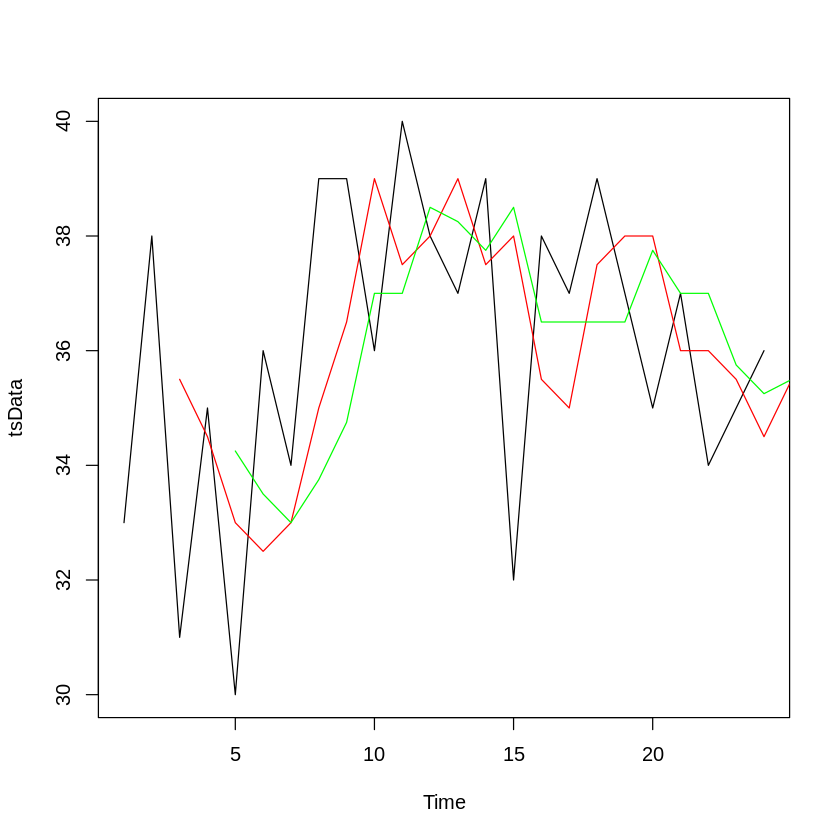

In [3]:
twoperiodMA <- c(NA,SMA(tsData,2))
fourperiodMA <- c(NA,SMA(tsData,4))

{plot(tsData)
lines(twoperiodMA,col="red")
lines(fourperiodMA,col="green")}

# Calculating MSE for moving averages

In [4]:
mse1 = (twoperiodMA- c(tsData,NA))^2
mse1 = mse1[!is.na(mse1)]
mse1 = mse1[3:22]
mean(mse1)

mse2 = (fourperiodMA- c(tsData,NA))^2
mse2 = mse2[!is.na(mse2)]
mean(mse2)




[1] 6.6

[1] 7.6625

# Weighted moving average

[1] 9.403409

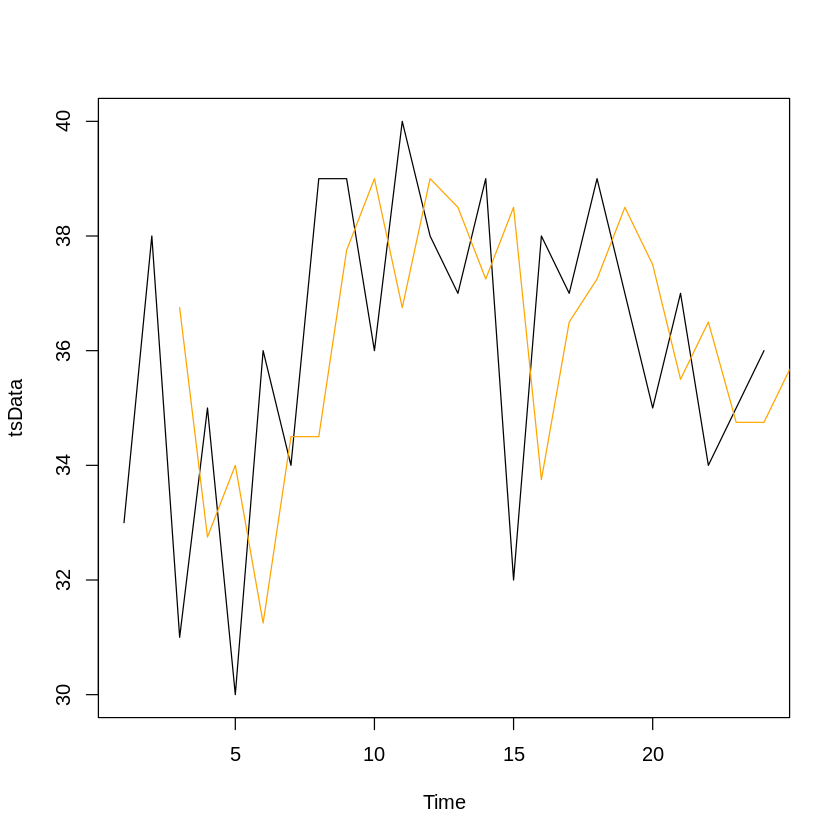

In [7]:
twoperiodWMA <- c(NA,WMA(tsData,2,wts = c(0.25,0.75)))

{plot(tsData)
lines(twoperiodWMA,col="orange")}


mse3 = (twoperiodWMA- c(tsData,NA))^2
mse3 = mse3[!is.na(mse3)]
mean(mse3)

# Exponential smoothing

[1] 16.82609

[1] 12.44721

[1] 8.534071

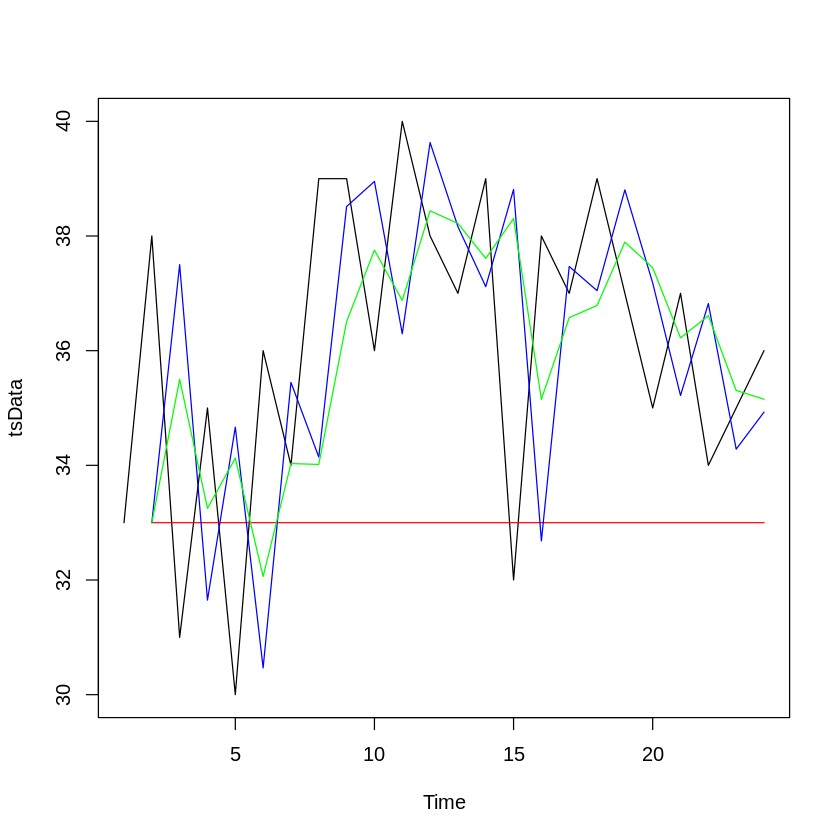

In [12]:
#install.packages("forecast")
require(forecast)


exponentialSmoothing  <- ses(tsData,h=1,alpha = 0,initial="simple")$fitted
exponentialSmoothing[1] <- NA

mse4 = (exponentialSmoothing- c(tsData))^2
mse4 = mse4[!is.na(mse4)]
mean(mse4)

plot(tsData)
lines(exponentialSmoothing,col="red")

exponentialSmoothing  <- ses(tsData,h=1,alpha = 0.9,initial="simple")$fitted
exponentialSmoothing[1] <- NA

mse4 = (exponentialSmoothing- c(tsData))^2
mse4 = mse4[!is.na(mse4)]
mean(mse4)

lines(exponentialSmoothing,col="blue")

exponentialSmoothing  <- ses(tsData,h=1,alpha = 0.5,initial="simple")$fitted
exponentialSmoothing[1] <- NA

lines(exponentialSmoothing,col="green")

mse4 = (exponentialSmoothing- c(tsData))^2
mse4 = mse4[!is.na(mse4)]
mean(mse4)

In [13]:
#### Optimal Values
exponentialSmoothingOptimized  <- ses(tsData, h=10, initial="simple")
#Model
exponentialSmoothingOptimized$model
#Forecasts
exponentialSmoothingOptimized



Simple exponential smoothing 

Call:
 ses(y = tsData, h = 10, initial = "simple") 

  Smoothing parameters:
    alpha = 0.2679 

  Initial states:
    l = 33 

  sigma:  2.7374

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
25       35.81195 32.30379 39.32012 30.44668 41.17723
26       35.81195 32.18009 39.44382 30.25749 41.36642
27       35.81195 32.06046 39.56345 30.07454 41.54937
28       35.81195 31.94454 39.67937 29.89725 41.72666
29       35.81195 31.83198 39.79192 29.72512 41.89879
30       35.81195 31.72253 39.90138 29.55772 42.06619
31       35.81195 31.61593 40.00798 29.39469 42.22922
32       35.81195 31.51197 40.11194 29.23570 42.38821
33       35.81195 31.41047 40.21344 29.08046 42.54345
34       35.81195 31.31125 40.31266 28.92872 42.69518

# Seasonality additive

[1] 8542.454

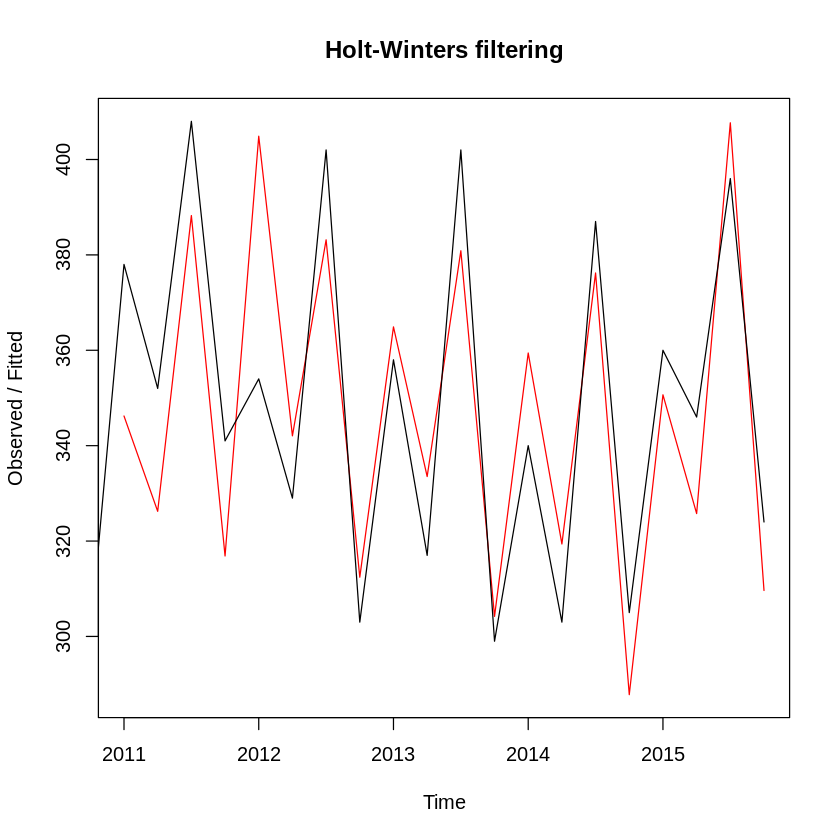

In [15]:
data<- c(330,310,370,300,378,352,408,341,354,329,402,303,358,317,402,299,340,303,387,305,360,346,396,324)
tsData <- ts(data,frequency = 4, start = 2010)

seasonalModel <- HoltWinters(tsData,alpha=0.5,beta=FALSE,gamma=0.5)
plot(seasonalModel)
seasonalModel$SSE



Holt-Winters exponential smoothing without trend and with additive seasonal component.

Call:
HoltWinters(x = tsData, beta = FALSE)

Smoothing parameters:
 alpha: 0.490989
 beta : FALSE
 gamma: 0.365625

Coefficients:
        [,1]
a  356.85359
s1  14.73305
s2 -13.17893
s3  48.77822
s4 -37.71350

[1] 8478.682

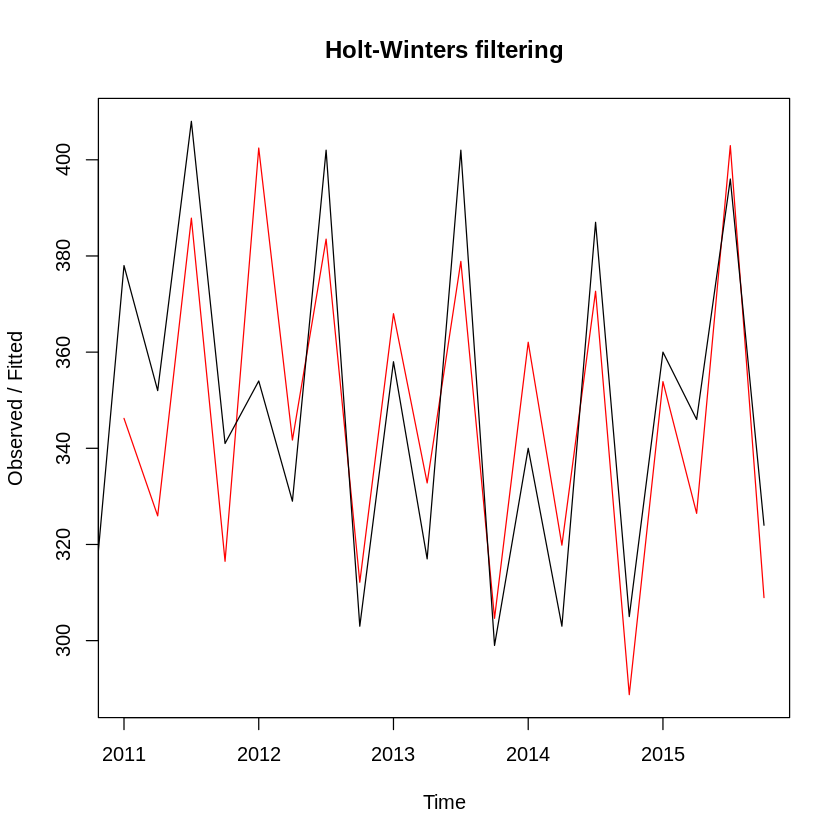

In [16]:
seasonalModelOptimized <- HoltWinters(tsData,beta=FALSE)
seasonalModelOptimized
plot(seasonalModelOptimized)
seasonalModelOptimized$SSE

# Seasonality multiplicative


[1] 9439.109

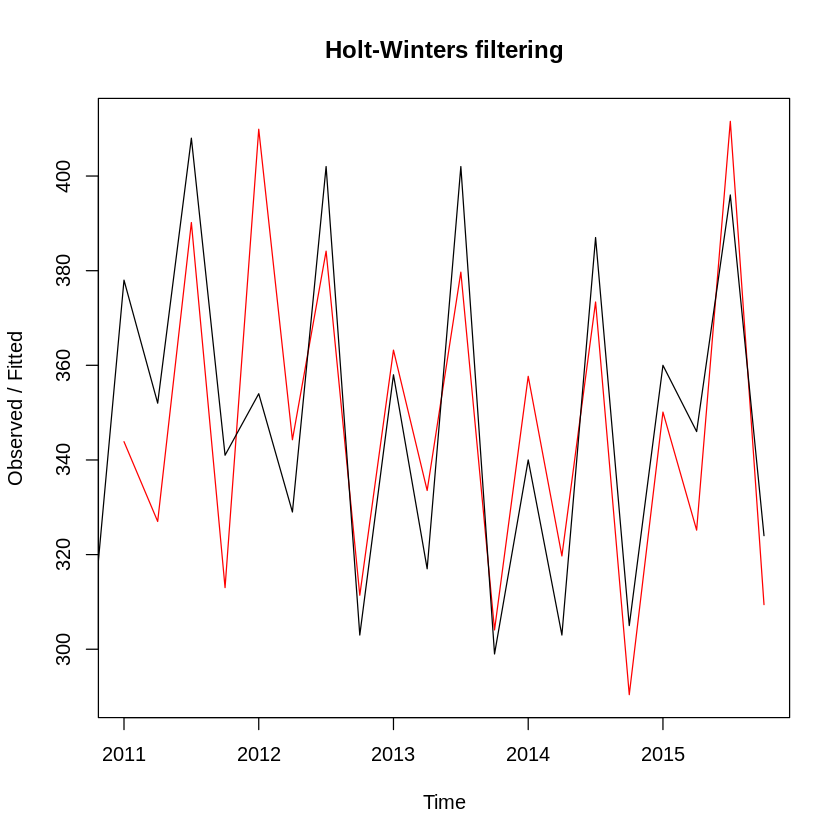

In [17]:
seasonalModelMultiplicative <- HoltWinters(tsData,alpha=0.5,beta=FALSE,gamma=0.5,seasonal = "multiplicative")
plot(seasonalModelMultiplicative)
seasonalModelMultiplicative$SSE



[1] 9113.678

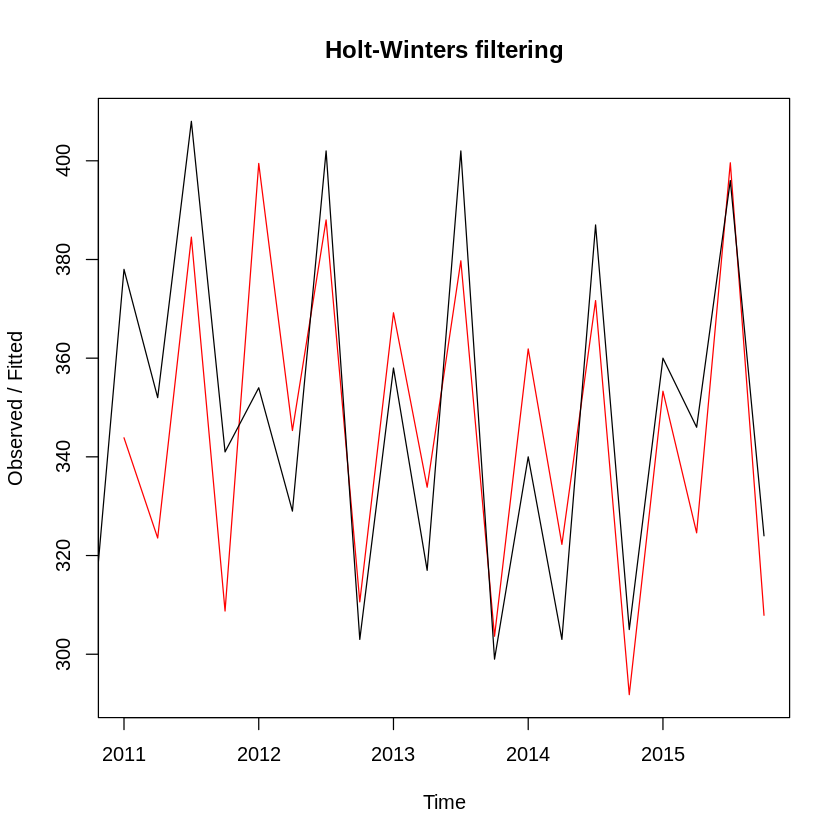

In [19]:
seasonalModelMultiplicativeOptimal <- HoltWinters(tsData,beta=FALSE,seasonal = "multiplicative")
plot(seasonalModelMultiplicativeOptimal)
seasonalModelMultiplicativeOptimal$SSE


# Trend

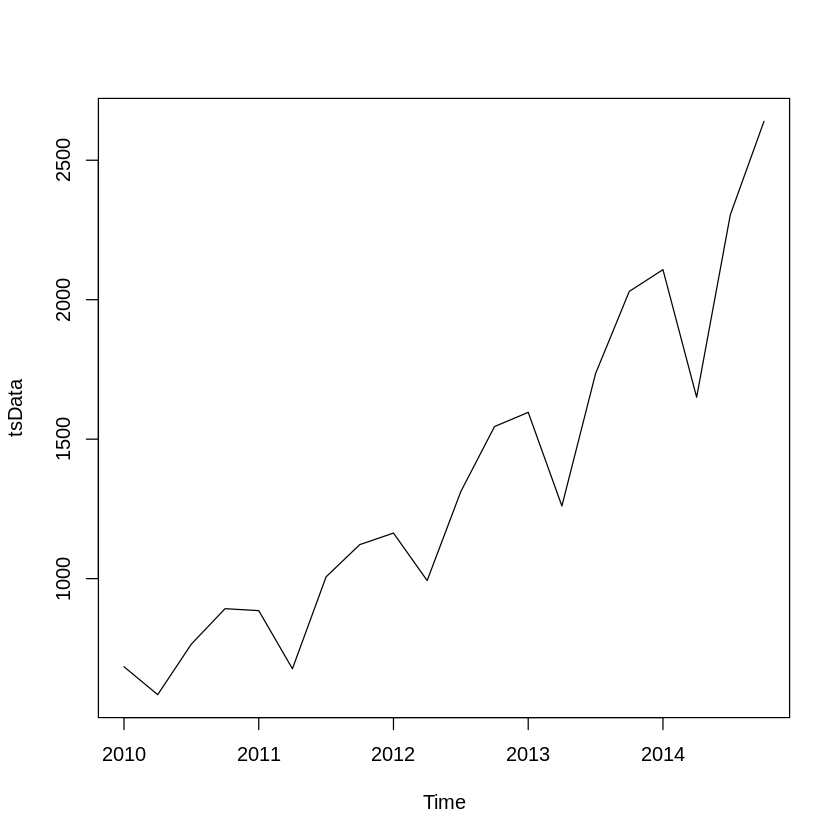

[1] 1424260

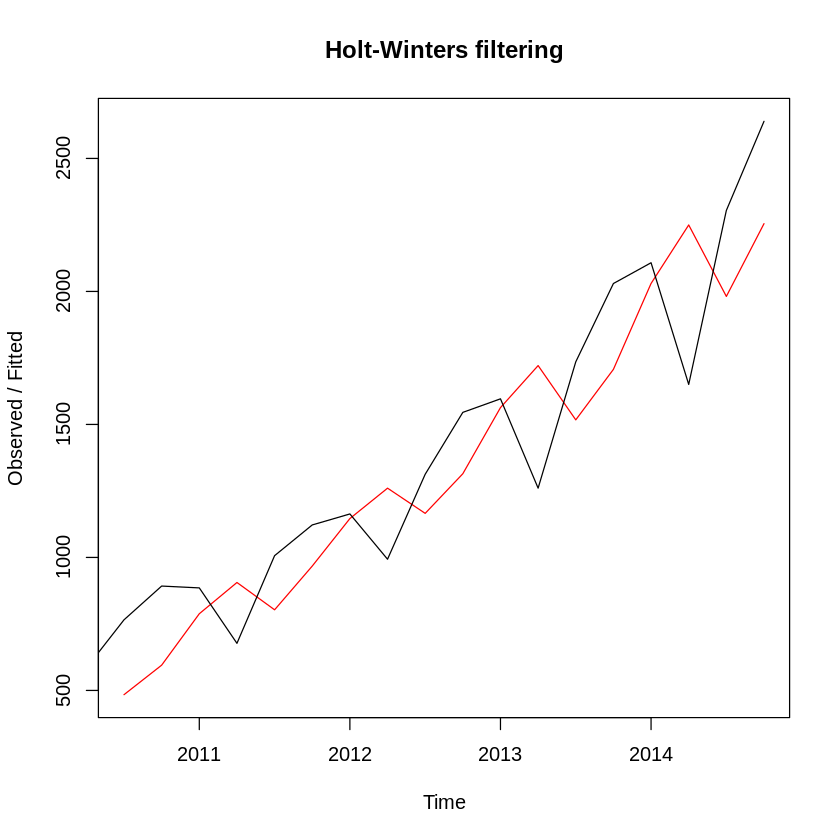

In [21]:
data <- c(684.2,584.1,765.4,892.3,885.4,677.0,1006.6,1122.1,1163.4,993.2,1312.5,1545.3,1596.2,1260.4,1735.2,2029.7,2107.8,1650.3,2304.4,2639.4)
tsData <- ts(data,frequency = 4,start=2010)

plot(tsData)
trendModel <- HoltWinters(tsData,alpha=0.5,beta=0.5,gamma=FALSE)
plot(trendModel)
trendModel$SSE




# Trend + Seasonality

## Additive Seasonal Term

[1] 209396.1

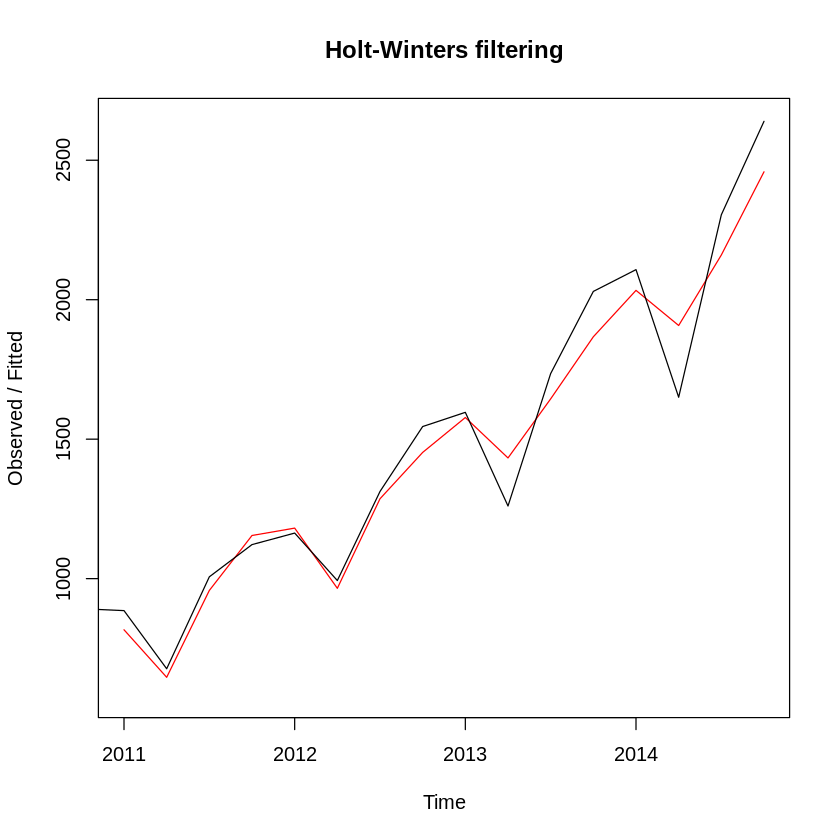

In [22]:
#exogenous values
trendModelSeasonAdditive <- HoltWinters(tsData,alpha=0.5,beta=0.5,gamma=0.5)
plot(trendModelSeasonAdditive)
trendModelSeasonAdditive$SSE





[1] 100414.6

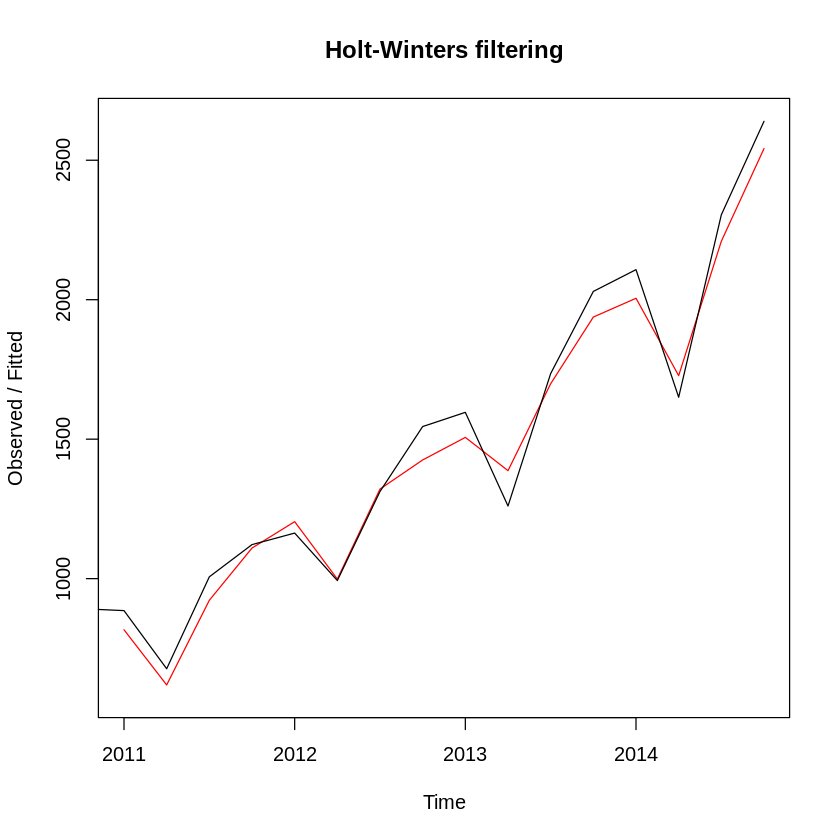

In [23]:
#optimal values
trendModelSeasonAdditive <- HoltWinters(tsData)
plot(trendModelSeasonAdditive)
trendModelSeasonAdditive$SSE


## Multiplicative Seasonal Term

[1] 37570.19

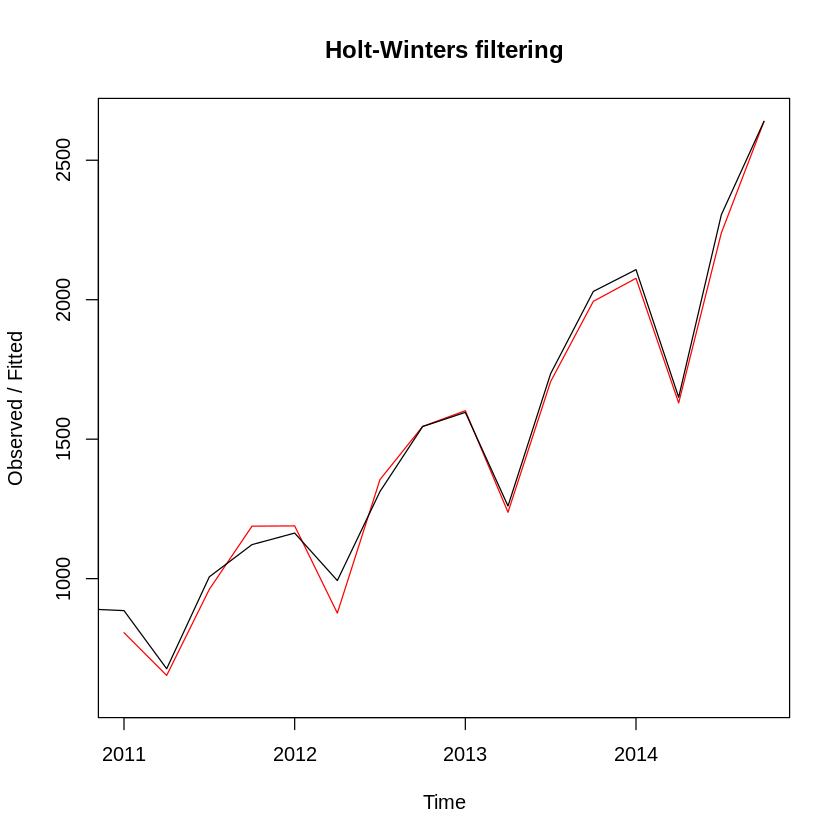

In [26]:

#exogenous values
trendModelSeasonMultiplicative <- HoltWinters(tsData,seasonal = "multiplicative",alpha=0.5,beta=0.5,gamma=0.5)
plot(trendModelSeasonMultiplicative)
trendModelSeasonMultiplicative$SSE



[1] 33942.8

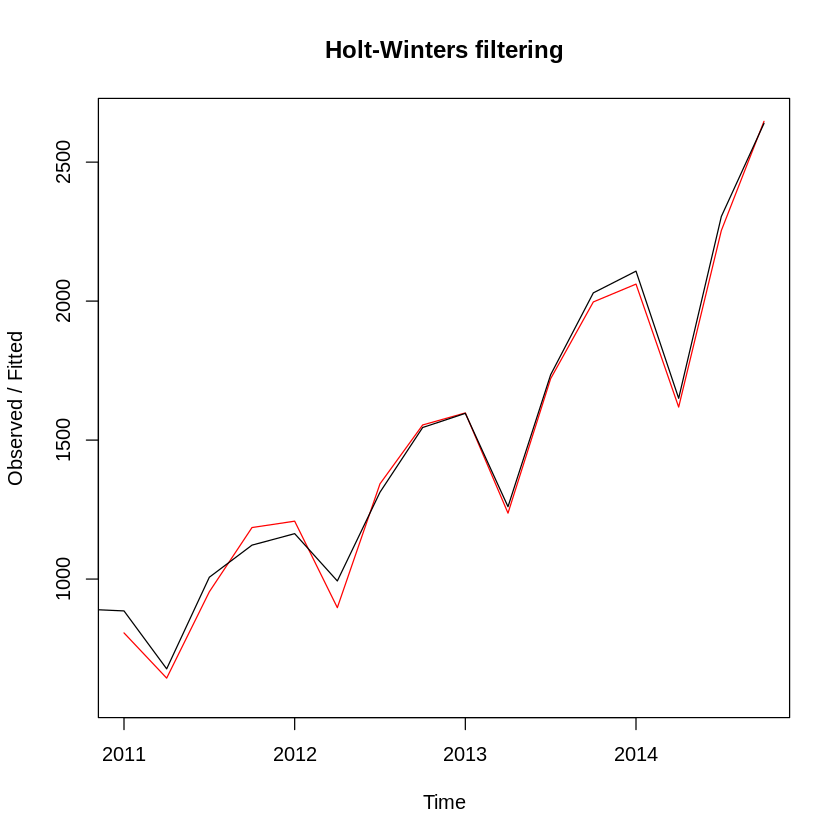

In [25]:
#optimal values
trendModelSeasonMultiplicative <- HoltWinters(tsData,seasonal = "multiplicative")
plot(trendModelSeasonMultiplicative)
trendModelSeasonMultiplicative$SSE